In [27]:
import json
import matplotlib.pyplot as plt

In [28]:
path = "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-continue/trainer_state.json"

In [29]:
with open(path, 'r') as f:
    data = json.load(f)

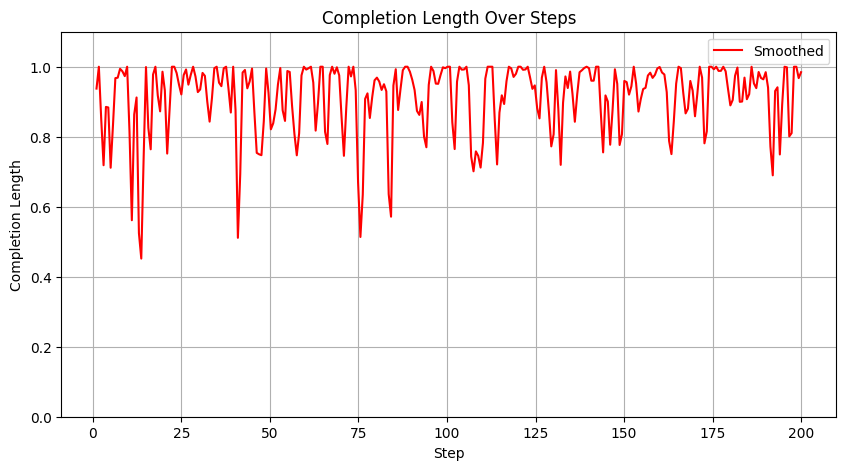

In [34]:
import numpy as np
from scipy.interpolate import make_interp_spline
# 假设 data['log_history'] 是你的数据源
completion_lengths = [entry['rewards/accuracy_process_NER'] for entry in data['log_history']][:200]
steps = [entry['step'] for entry in data['log_history']][:200]

# 创建更多的步骤点以平滑曲线
steps_smooth = np.linspace(min(steps), max(steps), 300)
spl = make_interp_spline(steps, completion_lengths, k=3)  # k是样条曲线的阶数
completion_lengths_smooth = spl(steps_smooth)
completion_lengths_smooth = np.clip(completion_lengths_smooth, None, 1.0)


# 绘图
plt.figure(figsize=(10, 5))
# plt.plot(steps, completion_lengths, linestyle='-', label='Original')
plt.plot(steps_smooth, completion_lengths_smooth, linestyle='-', color='red', label='Smoothed')
plt.title('Completion Length Over Steps')
plt.xlabel('Step')
plt.ylabel('Completion Length')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

In [31]:
import math
from collections import Counter

def calculate_entropy(text):
    # 计算每个字符的频率
    counter = Counter(text)
    total = len(text)
    
    # 计算熵
    entropy = 0
    for count in counter.values():
        probability = count / total
        entropy -= probability * math.log2(probability)
    return entropy

# 示例文本
text1 = "example text 1 1 1 1"
text2 = "another example text 2"

# 计算熵
entropy1 = calculate_entropy(text1)
entropy2 = calculate_entropy(text2)

print(f"Entropy of text1: {entropy1}")
print(f"Entropy of text2: {entropy2}")

Entropy of text1: 2.903701696057348
Entropy of text2: 3.481714572986072


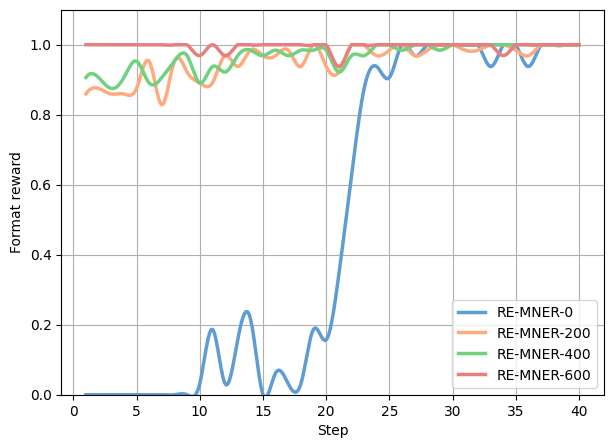

In [67]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 定义文件路径列表
paths = [
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-continue/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-cold-200-continue-cold-segreward-all/checkpoint-100/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-cold-400-continue-cold-segreward-all/checkpoint-100/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-continue-cold-segreward/checkpoint-2000/trainer_state.json",
]

# 设置不同的颜色以区分不同的曲线
colors = ['#5e9cd3', '#ffaa7d', '#70d17e', '#e68080']
labels = ['RE-MNER-0', 'RE-MNER-200', 'RE-MNER-400', 'RE-MNER-600']

plt.figure(figsize=(7, 5))

# 遍历每个文件路径
for path, color, label in zip(paths, colors, labels):
    with open(path, 'r') as f:
        data = json.load(f)

    # 假设 data['log_history'] 是你的数据源
    completion_lengths = [entry['rewards/format_reward'] for entry in data['log_history']][:40]
    steps = [entry['step'] for entry in data['log_history']][:40]

    # 创建更多的步骤点以平滑曲线
    steps_smooth = np.linspace(min(steps), max(steps), 300)
    spl = make_interp_spline(steps, completion_lengths, k=3)  # k是样条曲线的阶数
    completion_lengths_smooth = spl(steps_smooth)
    completion_lengths_smooth = np.clip(completion_lengths_smooth, None, 1.0)

    # 绘制平滑后的曲线
    plt.plot(steps_smooth, completion_lengths_smooth, linestyle='-', color=color, label=label, linewidth=2.5)

# plt.title('Completion Length Over Steps')
plt.xlabel('Step')
plt.ylabel('Format reward')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.savefig('format_reward.png', format='png', dpi=600)
plt.show()

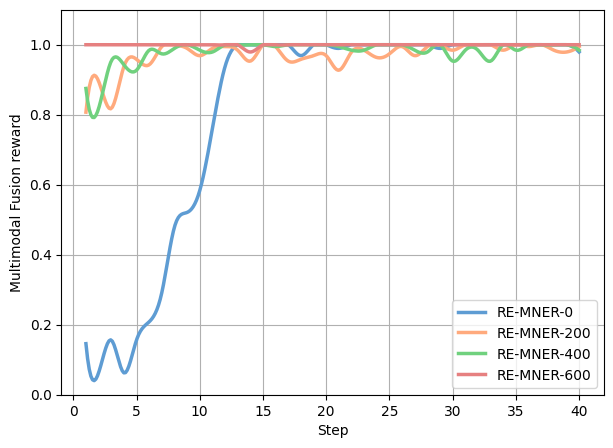

In [66]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 定义文件路径列表
paths = [
    "/group/40064/johnbli/Code/Deepseek/VLM-R1/checkpoints/Qwen2.5-VL-3steps-zero/checkpoint-3000/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-cold-200-continue-cold-segreward-all/checkpoint-100/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-cold-400-continue-cold-segreward-all/checkpoint-100/trainer_state.json",
    "/group/40064/johnbli/Code/Deepseek/open-r1-multimodal/checkpoints/Qwen2-VL-7B-continue-cold-segreward/checkpoint-2000/trainer_state.json",
]

# 设置不同的颜色以区分不同的曲线
colors = ['#5e9cd3', '#ffaa7d', '#70d17e', '#e68080']
labels = ['RE-MNER-0', 'RE-MNER-200', 'RE-MNER-400', 'RE-MNER-600']

plt.figure(figsize=(7, 5))

# 遍历每个文件路径
i = 0
for path, color, label in zip(paths, colors, labels):
    with open(path, 'r') as f:
        data = json.load(f)

    # 假设 data['log_history'] 是你的数据源
    completion_lengths = [entry['rewards/seg_NER_reward'] for entry in data['log_history']][:40]

    steps = [entry['step'] for entry in data['log_history']][:40]

    # 创建更多的步骤点以平滑曲线
    steps_smooth = np.linspace(min(steps), max(steps), 300)
    spl = make_interp_spline(steps, completion_lengths, k=3)  # k是样条曲线的阶数
    completion_lengths_smooth = spl(steps_smooth)
    completion_lengths_smooth = np.clip(completion_lengths_smooth, None, 1.0)

    # 绘制平滑后的曲线
    plt.plot(steps_smooth, completion_lengths_smooth, linestyle='-', color=color, label=label, linewidth=2.5)
    i += 1

# plt.title('Completion Length Over Steps')
plt.xlabel('Step')
plt.ylabel('Multimodal Fusion reward')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.savefig('M_reward.png', format='png', dpi=600)
plt.show()

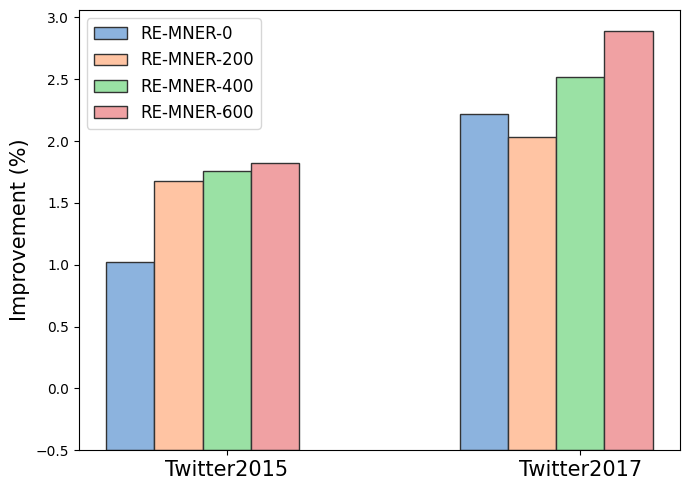

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
methods = ['Twitter2015', 'Twitter2017']

improvements = {
    'RE-MNER-0': [2.16, 0.20],
    'RE-MNER-200': [0.93, 0.23],
    'RE-MNER-400': [5.57,1.06],
    'RE-MNER-600':[2.78, 0.31]
}

improvements2 = {
    'RE-MNER-0': [78.37-76.85, 88.73-86.01],
    'RE-MNER-200': [79.03-76.85, 88.54-86.01],
    'RE-MNER-400': [79.11-76.85,89.03-86.01],
    'RE-MNER-600':[79.17-76.85, 89.40-86.01]
}

# index = np.arange(len(methods))
index = np.array([0, 1.1])
bar_width = 0.15

# 创建柱状图
plt.figure(figsize=(7, 5))

# 颜色定义
colors = {'RE': '#7ca1d4', 'NER': '#75c07b', 'Time Cost': '#ffb162'}
edge_color = '#333333'

# 绘制每个指标的柱状图
bars_RE = plt.bar(index, improvements2['RE-MNER-0'], bar_width, label='RE-MNER-0', color='#8cb3de', edgecolor=edge_color, bottom=-0.5)
bars_NER = plt.bar(index + bar_width, improvements2['RE-MNER-200'], bar_width, label='RE-MNER-200', color='#ffc4a3', edgecolor=edge_color, bottom=-0.5)

bars_pgd = plt.bar(index + 2*bar_width, improvements2['RE-MNER-400'], bar_width, label='RE-MNER-400', color='#9ae1a4', edgecolor=edge_color, bottom=-0.5)
bars_fgsm = plt.bar(index + 3*bar_width, improvements2['RE-MNER-600'], bar_width, label='RE-MNER-600', color='#f0a1a3', edgecolor=edge_color, bottom=-0.5)
# bars_TC = plt.bar(index + 4*bar_width, improvements2['IT + ANIT'] , bar_width, label='IT + ANIT', color=colors['Time Cost'], edgecolor=edge_color, bottom=-0.5)

# 添加数据标签
def add_labels(bars, data):
    for bar, datum in zip(bars, data):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height - 0.4, f'{datum:.2f}', ha='center', va='bottom')

# 添加参考线
# plt.axhline(y=0.0, color="red", linestyle='--', linewidth=2, xmin=0, xmax=1.0)

# 设置y轴范围
# plt.ylim(-0.5, max(max(improvements['IT']), max(improvements['IT + FreeLB']), max(improvements['IT + ANIT'])) * 1.1)

# 添加数据标签
# add_labels(bars_RE, improvements2['RE-MNER-0'])
# add_labels(bars_NER, improvements2['RE-MNER-200'])
# add_labels(bars_TC, improvements2['RE-MNER-400'])
# add_labels(bars_pgd, improvements2['RE-MNER-600'])
# add_labels(bars_fgsm, improvements['IT + FGSM'])

# 在红色虚线下方添加 "baseline" 标签
# plt.text(index[-2] + 6.4 * bar_width, -0.1, 'baseline', color='red', ha='right', va='top', fontsize=12, fontweight='bold')

# 计算竖线位置
vline_position = index[-2] + 4 * bar_width

# 添加竖线
# plt.axvline(x=vline_position, color="black", linestyle='--', linewidth=2)

# 添加标题和标签
# plt.xlabel('Methods')
plt.ylabel('Improvement (%)',fontsize=15)
# plt.title('Improvement by Different Methods',fontsize=15)
plt.xticks(index + 2*bar_width, methods, fontsize=15)

# 显示图例
plt.legend(fontsize='large')

plt.savefig('improvement.png', format='png', dpi=600)
# 显示图形
plt.tight_layout()
plt.show()